# Dataset EDA

Simple EDA prior to data cleaning and feature engineering/pruning.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd 
import contextily as ctx
from shapely.geometry import Point 

%matplotlib inline

In [40]:
# Set max display options so that I can see everything I need to see
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

## Importing Dataset

The dataset has been split into training and test sets on the DrivenData website and will be using that split later on during modelling. For EDA purposes I will not be combining the train and test features to prevent data leakage and biased analysis. 

In [3]:
# Training data features
df_features = pd.read_csv('../data/raw/training_set_values.csv')
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
# Training data targets
df_target = pd.read_csv('../data/raw/training_set_labels.csv')
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [51]:
# Combined dataframe of features and target variables
df = pd.merge(df_features, df_target, on='id')

In [53]:
# Renaming 'status_group' to 'target'
df.rename(columns={'status_group': 'target'})

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


---

## Examining Target Variable

In [6]:
# Checking class balance
df['target'].value_counts()

target
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_60243/1689945861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=target_counts.index, x=target_counts.values, palette='Dark2')


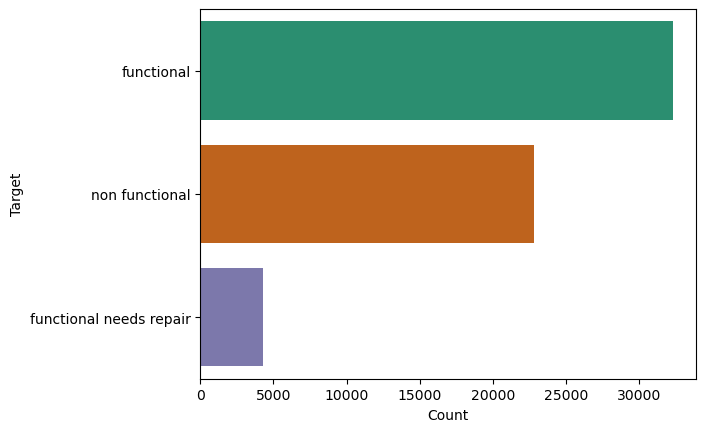

In [36]:
target_counts = df['target'].value_counts()
ax = sns.barplot(y=target_counts.index, x=target_counts.values, palette='Dark2')
ax.set_ylabel('Target')
ax.set_xlabel('Count')

plt.savefig('../images/target_barplot.png', dpi=300, bbox_inches='tight')

There is a clear **class imbalance** with 'functional needs repair' recorded at a way lower frequency in the dataset. There are three paths I can take here. The first and easiest to execute is simply treating 'functional needs repair' as an irrelevant target and dropping it completely from the dataset.

The second is investigating whether the smallest class here is similar enough to one of the larger classes and merge it with the class it is most similar with. For example, perhaps 'funcional needs repair' means that a water pump is functional enough that it could be merged into the 'functional' target class. 

The third option is to employ some of the myriad techniques that deal with imbalanced classes in ML. I could use SMOTE or oversampling/undersampling with the imblearn library. 

### Plotting Targets on a Map of Tanzania

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_60243/1653624215.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")


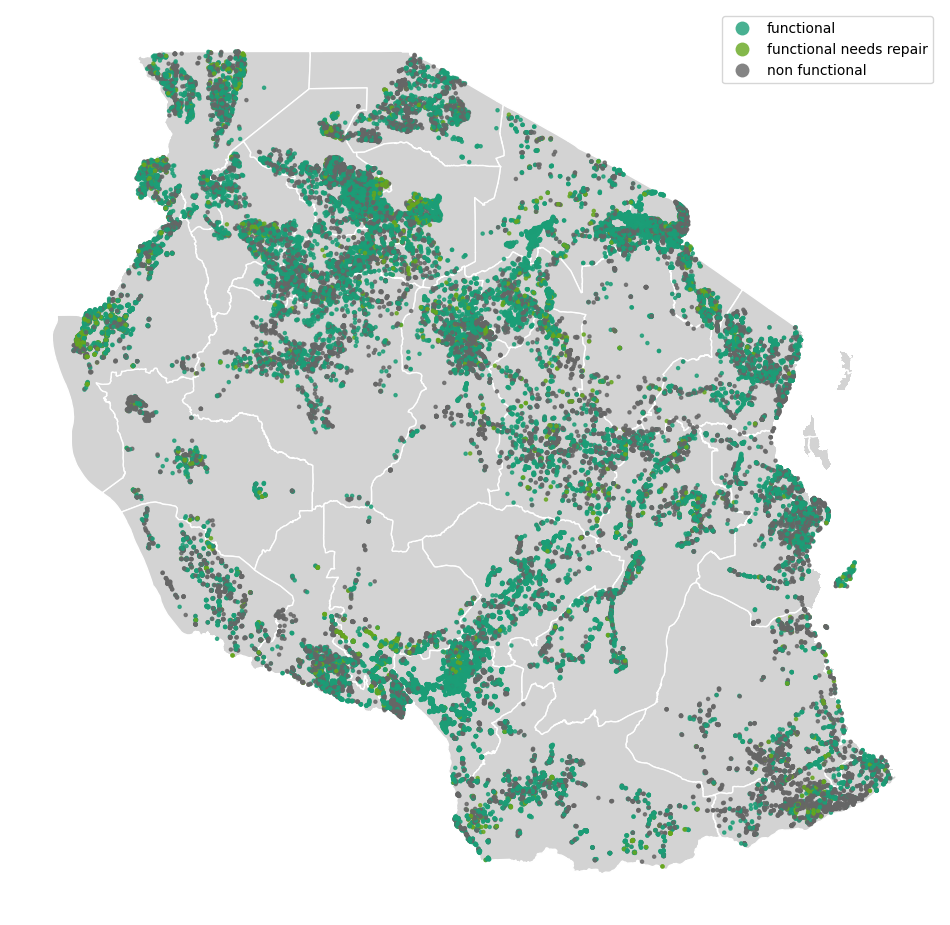

In [32]:
# Plotting water pump status (target) on map of Tanzania

# Load Tanzania shapefile (country boundary)
tanzania = gpd.read_file("../images/shapefiles/gadm41_TZA_1.shp")

# Load your data (coordinates in the dataset)
coordinates_df = df[['longitude', 'latitude', 'target']].dropna()

# Create GeoDataFrame from coordinates
geometry = [Point(xy) for xy in zip(coordinates_df['longitude'], coordinates_df['latitude'])]
gdf = gpd.GeoDataFrame(coordinates_df, geometry=geometry, crs="EPSG:4326")  # Set CRS to WGS 84

# Filter points that are within Tanzania's boundary
gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")

# Plot Tanzania's boundary and data points
fig, ax = plt.subplots(figsize=(12, 12))
tanzania.plot(ax=ax, color="lightgray", edgecolor='white')  # Plot Tanzania shape
gdf_in_tanzania.plot(ax=ax, column='target', cmap='Dark2', legend=True, markersize=5, alpha=0.8)  # Plot points inside Tanzania

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

# Remove axis for a cleaner map
ax.set_axis_off()

# Show the map
plt.show()

/var/folders/qw/rb7_t46j2zzdbl34bgb2vjg40000gn/T/ipykernel_60243/1654023914.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")


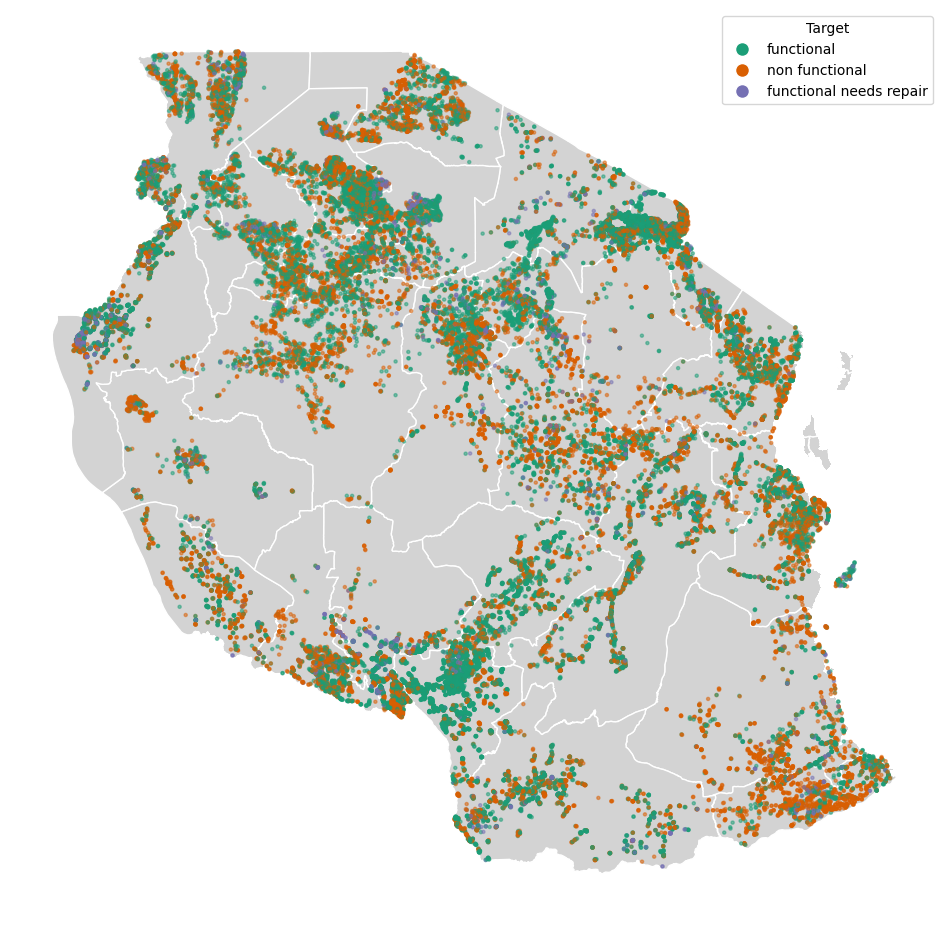

In [35]:
# Plotting target variables on map of Tanzania

# Load Tanzania shapefile (country boundary)
tanzania = gpd.read_file("../images/shapefiles/gadm41_TZA_1.shp")

# Load your data (coordinates in the dataset)
coordinates_df = df[['longitude', 'latitude', 'target']].dropna()

# Create GeoDataFrame from coordinates
geometry = [Point(xy) for xy in zip(coordinates_df['longitude'], coordinates_df['latitude'])]
gdf = gpd.GeoDataFrame(coordinates_df, geometry=geometry, crs="EPSG:4326")  # Set CRS to WGS 84

# Filter points that are within Tanzania's boundary
gdf_in_tanzania = gpd.sjoin(gdf, tanzania, how="inner", predicate="within")

# Get the unique categories from the 'target' column
unique_categories = gdf_in_tanzania['target'].unique()

# Create a seaborn color palette
palette = sns.color_palette('Dark2', n_colors=len(unique_categories))

# Create a dictionary to map each category to a color
color_dict = dict(zip(unique_categories, palette))

# Map the colors to the 'target' column in the GeoDataFrame
gdf_in_tanzania['color'] = gdf_in_tanzania['target'].map(color_dict)

# Plot Tanzania's boundary and data points with the mapped colors
fig, ax = plt.subplots(figsize=(12, 12))

# Plot Tanzania shape
tanzania.plot(ax=ax, color="lightgray", edgecolor='white')

# Plot points using the manually mapped colors
gdf_in_tanzania.plot(ax=ax, color=gdf_in_tanzania['color'], markersize=5, alpha=0.5)

# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[cat], markersize=10, label=cat)
           for cat in unique_categories]
ax.legend(handles=handles, title="Target", bbox_to_anchor=(1, 1))

# Remove axis for a cleaner map
ax.set_axis_off()

plt.savefig('../images/target_scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()

---

## Examining Features

### Custom Functions for EDA

The custom functions used below are all are borrowed directly from GitHub user [BrendaLoznik](https://github.com/BrendaLoznik). These functions are excellent for diving deeper into the features in my dataset, particularly so because of the lack of domain knowledge on my part for this topic. For a detailed look at the functions see utils.py in the src folder.

In [2]:
from src.utils import *

ModuleNotFoundError: No module named 'src'

In [3]:
import os
print(os.getcwd())

/Users/williamguo/Documents/Flatiron/Assignments/Phase 3/ds-p3-project/notebooks


Let's take a closer look at the features in our dataset.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [42]:
df.sample(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
56730,2457,0.0,2011-04-08,Water,0,Gover,36.554454,-6.528279,Kwa Julias,0,Wami / Ruvu,Chang'Ombe,Dodoma,1,0,Mpwapwa,Gode Gode,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
30994,21801,0.0,2011-08-11,African Muslim Agency,19,DWE,39.060497,-5.211765,Msikitini,0,Pangani,Tongoni,Tanga,4,4,Tanga,Tongoni,200,True,GeoData Consultants Ltd,VWC,Shallow well,True,2005,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
1450,70718,0.0,2011-04-17,Government Of Tanzania,0,Government,33.345893,-8.577699,Jackson Mpenzi,0,Lake Rukwa,Soweto B,Mbeya,12,1,Chunya,Itewe,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
32692,69953,0.0,2013-01-21,Fini Water,245,FINI WATER,38.997090,-9.907954,Binti Namaguto,0,Ruvuma / Southern Coast,Ilala,Lindi,80,53,Ruangwa,Namichinga,650,True,GeoData Consultants Ltd,VWC,NaN,False,1988,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2642,57325,0.0,2012-10-22,Mileniam Project,0,Mileniam project,32.559548,-5.071525,Nasibu Musa,0,Lake Tanganyika,Pulu,Tabora,14,3,Uyui,Ilolangulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
19867,22040,500.0,2011-03-08,Government Of Tanzania,1644,DWE,38.238076,-4.488624,Kwa Mzee Kibada,0,Pangani,Langoni,Tanga,4,1,Lushoto,Sunga,1,True,GeoData Consultants Ltd,VWC,Shengui forest,True,1971,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
6966,41284,0.0,2011-07-15,Government Of Tanzania,0,DWE,30.990717,-1.664600,Kwabushobelwa,0,Lake Victoria,Nyamieli B,Kagera,18,1,Karagwe,Kiruruma,0,True,GeoData Consultants Ltd,VWC,Nyamitoko water,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
21015,35468,0.0,2011-02-26,Danida,1587,DWE,35.052684,-8.212677,none,0,Rufiji,M,Iringa,11,2,Mufindi,Sadani,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
17604,18988,0.0,2013-03-17,Lawatefuka Water Supply,1239,Lawatefuka water sup,37.025814,-3.221611,Kwa Mercy Maleu,0,Pangani,Makiwaru,Kilimanjaro,3,7,Siha,Siha Kati,1,True,GeoData Consultants Ltd,Water Board,TM part Four,True,2003,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
3309,40119,50.0,2013-01-31,Mission,1174,Mission,34.763006,-6.254436,Kwa Daud Njarika,0,Rufiji,Imarampaka,Singida,13,3,Manyoni,Nkoko,4500,True,GeoData Consultants Ltd,VWC,Mradi wa Mission,False,2004,windmill,wind-powered,wind-powered,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwa